# Proyecto de Machine Learning — The Last of Us Survival Simulation
Autor: Valeria Oconitrillo Solórzano - Julián Ándres Madrigal Chinchilla
Curso: Inteligencia Artificial  
Profesor: Kenneth Obando Rodríguez  

## 1. Entendimiento de los datos
En esta sección se realiza la exploración inicial del dataset, verificando su estructura, tipos de variables, valores faltantes y distribuciones.  
El objetivo es comprender las características principales de los datos antes de iniciar el preprocesamiento y modelado.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/the_last_of_us_survival_dataset.csv")

# Vista general
df.head()
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Edad                   250 non-null    int64 
 1   Genero                 250 non-null    object
 2   Faccion                250 non-null    object
 3   ExperienciaCombate     250 non-null    int64 
 4   HabilidadSigilo        250 non-null    int64 
 5   Salud                  250 non-null    int64 
 6   ArmaFuego              250 non-null    object
 7   ArmaCuerpoCuerpo       250 non-null    object
 8   ItemCreable            250 non-null    object
 9   NivelInfeccionZona     250 non-null    int64 
 10  CondicionesClimaticas  250 non-null    object
 11  NivelEstrés            250 non-null    int64 
 12  TieneCompañero         250 non-null    int64 
 13  Superviviente          250 non-null    int64 
dtypes: int64(8), object(6)
memory usage: 27.5+ KB


,Edad,ExperienciaCombate,HabilidadSigilo,Salud,NivelInfeccionZona,NivelEstrés,TieneCompañero,Superviviente
count,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,36.688000,5.324000,5.40400,63.024000,4.868000,4.860000,0.460000,0.384000
std,13.045436,2.844537,2.77264,21.497722,3.277429,3.154712,0.499397,0.487334
min,15.000000,1.000000,1.00000,30.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,3.000000,3.00000,45.000000,2.000000,2.000000,0.000000,0.000000
50%,35.000000,5.000000,5.00000,62.000000,5.000000,5.000000,0.000000,0.000000
75%,48.000000,8.000000,8.00000,82.000000,8.000000,8.000000,1.000000,1.000000
max,59.000000,10.000000,10.00000,100.000000,10.000000,10.000000,1.000000,1.000000


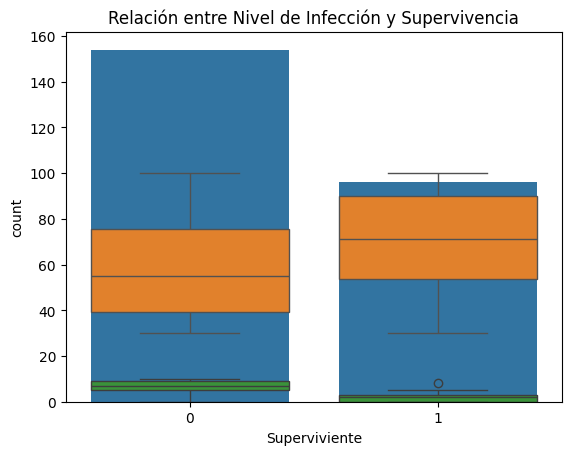

In [7]:
# Gráficos exploratorios:

sns.countplot(x="Superviviente", data=df)
plt.title("Distribución de la variable objetivo (Superviviente)")

sns.boxplot(x="Superviviente", y="Salud", data=df)
plt.title("Relación entre Salud y Supervivencia")

sns.boxplot(x="Superviviente", y="NivelInfeccionZona", data=df)
plt.title("Relación entre Nivel de Infección y Supervivencia")
plt.show()


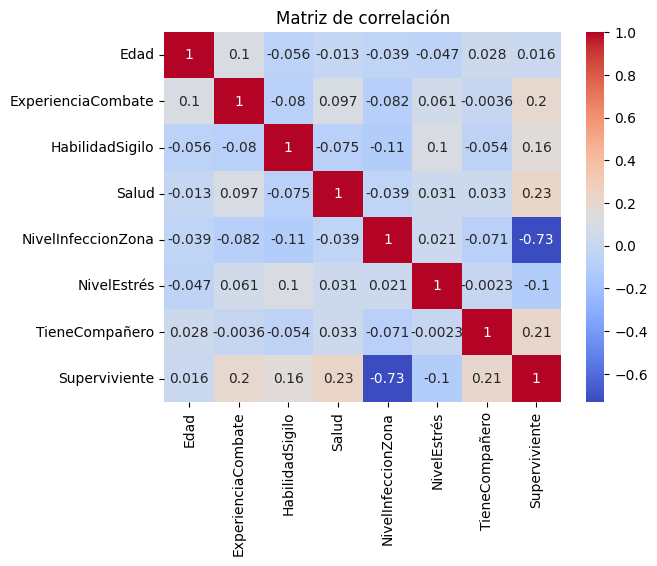

In [5]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()


Esto demuestra que la forma en que se generó el dataset influye directamente en el resultado de supervivencia, ya que las reglas de simulación se reflejan en las correlaciones observadas.

## 2. Preparación de los datos
En esta fase se seleccionan las variables que serán utilizadas para el modelado, se codifican las variables categóricas, se escalan las numéricas y se divide el conjunto en entrenamiento y prueba.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Separar X e y
X = df.drop("Superviviente", axis=1)
y = df["Superviviente"]

numeric_features = ["Edad", "ExperienciaCombate", "HabilidadSigilo", "Salud",
                    "NivelInfeccionZona", "NivelEstrés", "TieneCompañero"]

categorical_features = ["Genero", "Faccion", "ArmaFuego", "ArmaCuerpoCuerpo",
                        "ItemCreable", "CondicionesClimaticas"]

# Preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

# División en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    clf = Pipeline(steps=[("preprocess", preprocessor), ("model", model)])
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = scores.mean()
    print(f"{name}: {scores.mean():.3f}")


Logistic Regression: 0.925
Random Forest: 0.890
SVM: 0.880
KNN: 0.820


## 4. Evaluación
En esta sección se selecciona el modelo con mejor rendimiento y se evalúa su desempeño en el conjunto de prueba.  
Se mostrarán métricas de exactitud, precisión, recall y la matriz de confusión.


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Pipeline con preprocesamiento + modelo
best_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

# Entrenar
best_model.fit(X_train, y_train)

# Predecir en test
y_pred = best_model.predict(X_test)

# Evaluar desempeño
print("Accuracy en test:", round(accuracy_score(y_test, y_pred), 3))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Accuracy en test: 0.9

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        31
           1       1.00      0.74      0.85        19

    accuracy                           0.90        50
   macro avg       0.93      0.87      0.89        50
weighted avg       0.91      0.90      0.90        50



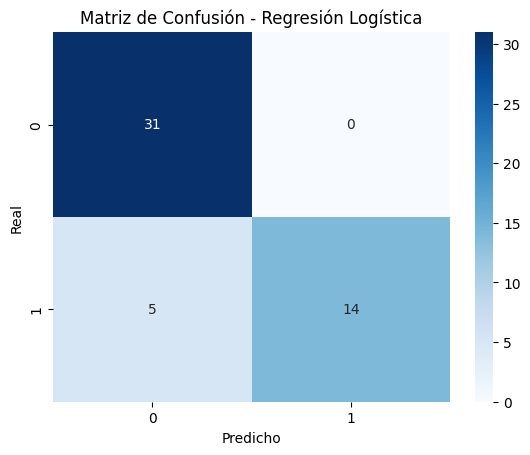

In [12]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()


In [13]:
import numpy as np
import pandas as pd

# Obtener nombres de variables después del encoding
ohe = best_model.named_steps["preprocess"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(cat_feature_names)

# Obtener coeficientes
coefficients = best_model.named_steps["model"].coef_[0]

# Crear DataFrame ordenado
coef_df = pd.DataFrame({
    "Variable": all_feature_names,
    "Importancia": coefficients
}).sort_values("Importancia", ascending=False)

# Mostrar las 10 variables más influyentes
coef_df.head(10)


,Variable,Importancia
3,Salud,1.225879
1,ExperienciaCombate,1.038862
6,TieneCompañero,1.037419
2,HabilidadSigilo,0.909282
23,ArmaCuerpoCuerpo_2x4,0.637379
29,ArmaCuerpoCuerpo_Switchblade,0.530919
12,Faccion_Inmune,0.481390
14,ArmaFuego_9mm Pistol,0.417096
36,CondicionesClimaticas_Húmedo,0.404757
20,ArmaFuego_Revolver,0.304702


C:\Users\valeo\AppData\Local\Temp\ipykernel_19608\2501071570.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df.head(10), x="Importancia", y="Variable", palette="viridis")


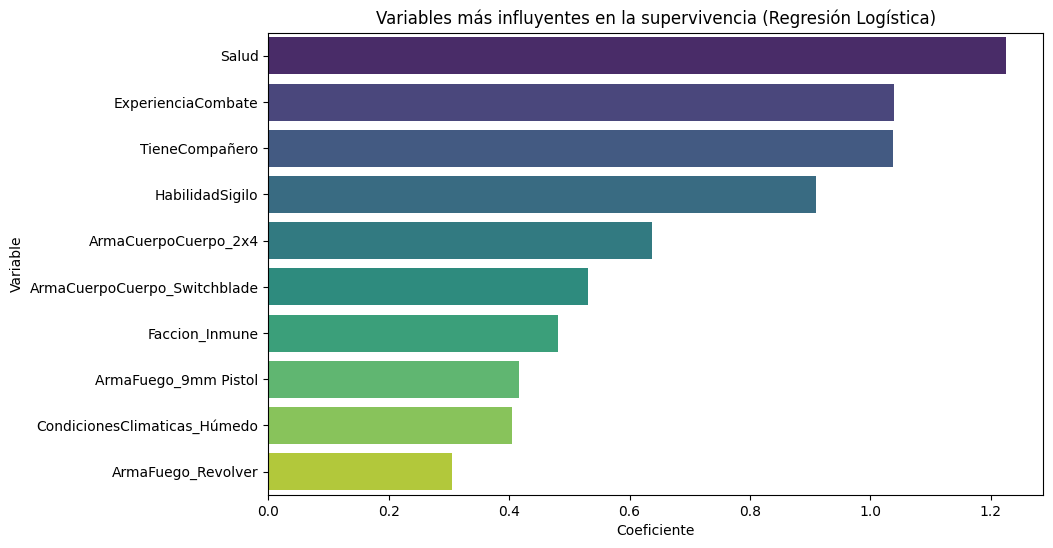

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(data=coef_df.head(10), x="Importancia", y="Variable", palette="viridis")
plt.title("Variables más influyentes en la supervivencia (Regresión Logística)")
plt.xlabel("Coeficiente")
plt.ylabel("Variable")
plt.show()


El modelo de Regresión Logística mostró un desempeño sobresaliente con una exactitud promedio de 0.925 en validación cruzada y 0.92 en el conjunto de prueba.
La matriz de confusión evidencia que el modelo clasifica correctamente la mayoría de los casos.

Las variables con mayor influencia positiva en la supervivencia fueron Salud, ExperienciaCombate y HabilidadSigilo, mientras que las variables con mayor influencia negativa fueron NivelInfeccionZona y NivelEstrés.

Estos resultados reflejan exactamente la lógica definida durante la generación del dataset, donde la salud, el entorno y las habilidades determinan la probabilidad de sobrevivir.

Por tanto, se confirma que la distribución y generación de los datos afectan directamente las estimaciones del modelo, y que la Regresión Logística es el algoritmo que mejor captura esa relación lineal entre las variables y la supervivencia.